In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# APPLICATION DATASET

In [2]:
#importing application data 

application = pd.read_csv('C:/Users/tdksi/OneDrive/Desktop/Gaurav/IIIT B Data Sciecne/EDA/Credit EDA/application_data (2).csv')
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
application.shape

(307511, 122)

In [4]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# DATA CLEANING

In [5]:
#DELETING UNWANTED COLUMNS FOR OUR ANALYSIS

application = application.drop(['SK_ID_CURR','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','NONLIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','FLOORSMAX_MODE','OCCUPATION_TYPE','OWN_CAR_AGE','YEARS_BUILD_MODE','YEARS_BEGINEXPLUATATION_MODE','BASEMENTAREA_MODE','APARTMENTS_MODE','NONLIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','LIVINGAPARTMENTS_AVG','LANDAREA_AVG','FLOORSMIN_AVG','EMERGENCYSTATE_MODE','WALLSMATERIAL_MODE','TOTALAREA_MODE','HOUSETYPE_MODE','FONDKAPREMONT_MODE','NONLIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','LIVINGAPARTMENTS_MEDI','LANDAREA_MEDI','FLOORSMIN_MEDI','FLOORSMAX_MEDI','ENTRANCES_MEDI','ELEVATORS_MEDI','COMMONAREA_MEDI','YEARS_BUILD_MEDI','YEARS_BEGINEXPLUATATION_MEDI','BASEMENTAREA_MEDI','APARTMENTS_MEDI','FLOORSMAX_AVG','FLOORSMIN_AVG','NONLIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','LIVINGAPARTMENTS_AVG','LANDAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','ENTRANCES_AVG','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','EXT_SOURCE_3','EXT_SOURCE_1','DAYS_ID_PUBLISH','DAYS_REGISTRATION','CNT_CHILDREN','AMT_ANNUITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','REGION_POPULATION_RELATIVE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_EMP_PHONE','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'],axis=1)
application

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,202500.0,406597.5,351000.0,Unaccompanied,Working,...,0,0,Business Entity Type 3,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,270000.0,1293502.5,1129500.0,Family,State servant,...,0,0,School,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,67500.0,135000.0,135000.0,Unaccompanied,Working,...,0,0,Government,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,135000.0,312682.5,297000.0,Unaccompanied,Working,...,0,0,Business Entity Type 3,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,121500.0,513000.0,513000.0,Unaccompanied,Working,...,0,0,Religion,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,157500.0,254700.0,225000.0,Unaccompanied,Working,...,0,0,Services,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,Cash loans,F,N,Y,72000.0,269550.0,225000.0,Unaccompanied,Pensioner,...,0,0,XNA,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,Cash loans,F,N,Y,153000.0,677664.0,585000.0,Unaccompanied,Working,...,0,0,School,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,N,Y,171000.0,370107.0,319500.0,Unaccompanied,Commercial associate,...,0,0,Business Entity Type 1,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   NAME_CONTRACT_TYPE          307511 non-null  object 
 2   CODE_GENDER                 307511 non-null  object 
 3   FLAG_OWN_CAR                307511 non-null  object 
 4   FLAG_OWN_REALTY             307511 non-null  object 
 5   AMT_INCOME_TOTAL            307511 non-null  float64
 6   AMT_CREDIT                  307511 non-null  float64
 7   AMT_GOODS_PRICE             307233 non-null  float64
 8   NAME_TYPE_SUITE             306219 non-null  object 
 9   NAME_INCOME_TYPE            307511 non-null  object 
 10  NAME_EDUCATION_TYPE         307511 non-null  object 
 11  NAME_FAMILY_STATUS          307511 non-null  object 
 12  NAME_HOUSING_TYPE           307511 non-null  object 
 13  DAYS_BIRTH    

In [7]:
application.shape

(307511, 28)

Our unwanted columns are deleted. Now we will find missing values and then we will handle those missing values

In [8]:
#checking for missing values
application.isnull().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
WEEKDAY_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
ORGANIZATION_TYPE                 0
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR  

In [9]:
#deleting those columns which have 41519 missing values. 

application = application.drop(['AMT_REQ_CREDIT_BUREAU_HOUR'
,'AMT_REQ_CREDIT_BUREAU_DAY'
,'AMT_REQ_CREDIT_BUREAU_WEEK'
,'AMT_REQ_CREDIT_BUREAU_MON'
,'AMT_REQ_CREDIT_BUREAU_QRT'
,'AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1)

In [10]:
application.isnull().sum()

TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
CNT_FAM_MEMBERS                  2
REGION_RATING_CLIENT             0
WEEKDAY_APPR_PROCESS_START       0
REG_REGION_NOT_LIVE_REGION       0
REG_REGION_NOT_WORK_REGION       0
ORGANIZATION_TYPE                0
DAYS_LAST_PHONE_CHANGE           1
dtype: int64

In [11]:
#We can see that in AMT_GOODS_PRICE, NAME_TYPE_SUITE,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE   have missing values. So, will handle those columns. First, we will handle AMT_GOODS_PRICE. 
#We will fill this missing value column AMT_GOODS_PRICE by mode
application.AMT_GOODS_PRICE

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64

In [12]:
apl_mode = application.AMT_GOODS_PRICE.mode()[0]

In [13]:
application.AMT_GOODS_PRICE = application.AMT_GOODS_PRICE.fillna(apl_mode)

In [14]:
application['AMT_GOODS_PRICE'].isnull().sum()

0

In [15]:
#We will handle NAME_TYPE_SUITE

application['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

Since NAME_TYPE_SUITE is a categorical variable, we will see how we can handle this column. Since this column is all about who was accompanying client when he was applying for the loan, it is useless for our analysis. We will drop this entire column. 

In [16]:
application = application.drop(['NAME_TYPE_SUITE'], axis=1)

In [17]:
application.isnull().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
CNT_FAM_MEMBERS               2
REGION_RATING_CLIENT          0
WEEKDAY_APPR_PROCESS_START    0
REG_REGION_NOT_LIVE_REGION    0
REG_REGION_NOT_WORK_REGION    0
ORGANIZATION_TYPE             0
DAYS_LAST_PHONE_CHANGE        1
dtype: int64

In [18]:
application['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [19]:
#Since this column is containing incorrect values. We need to correct this particular column by removing the negative sign. 
application['DAYS_LAST_PHONE_CHANGE'] = abs(application['DAYS_LAST_PHONE_CHANGE'])
application['DAYS_LAST_PHONE_CHANGE'].unique()

array([1134.,  828.,  815., ..., 3988., 3899., 3538.])

In [20]:
application['DAYS_LAST_PHONE_CHANGE']

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

In [21]:
#Since we have 1 missing data, we will delete that particular row where we have a missin value

application[application['DAYS_LAST_PHONE_CHANGE'].isnull()]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
15709,0,Cash loans,M,Y,Y,126000.0,278613.0,252000.0,Working,Incomplete higher,...,House / apartment,-8574,-293,2.0,2,FRIDAY,0,0,Trade: type 3,NaN


In [22]:
application = application[~(application['DAYS_LAST_PHONE_CHANGE'].isnull() & (application.ORGANIZATION_TYPE == 'Trade: type 3'))]

In [23]:
#Since we have 2 missing data in CNT_FAM_MEMBERS. We will drop these 2 particular rows as well. 
application[application['CNT_FAM_MEMBERS'].isnull()]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
41982,0,Revolving loans,M,N,Y,450000.0,675000.0,450000.0,Commercial associate,Lower secondary,...,Municipal apartment,-12396,-1161,NaN,2,THURSDAY,0,1,Insurance,876.0
187348,0,Revolving loans,F,N,Y,202500.0,585000.0,450000.0,Commercial associate,Higher education,...,House / apartment,-12844,-232,NaN,2,FRIDAY,0,0,Business Entity Type 2,654.0


In [24]:
application = application[~(application['CNT_FAM_MEMBERS'].isnull() & (application.ORGANIZATION_TYPE == 'Insurance'))]
application = application[~(application['CNT_FAM_MEMBERS'].isnull() & (application.ORGANIZATION_TYPE == 'Business Entity Type 2'))]

In [25]:
application.isnull().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
WEEKDAY_APPR_PROCESS_START    0
REG_REGION_NOT_LIVE_REGION    0
REG_REGION_NOT_WORK_REGION    0
ORGANIZATION_TYPE             0
DAYS_LAST_PHONE_CHANGE        0
dtype: int64

In [26]:
#Fixing incorrect values in the dataset

application['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [27]:
application['DAYS_BIRTH'] = abs(application['DAYS_BIRTH'])
application['DAYS_BIRTH'].head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

In [28]:
application['DAYS_EMPLOYED']
application['DAYS_EMPLOYED'] = abs(application['DAYS_EMPLOYED'])

We have removed all the missing values from the dataset and fixed incorrect values. Now we will handle outliers in the dataset

In [29]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307508 non-null  int64  
 1   NAME_CONTRACT_TYPE          307508 non-null  object 
 2   CODE_GENDER                 307508 non-null  object 
 3   FLAG_OWN_CAR                307508 non-null  object 
 4   FLAG_OWN_REALTY             307508 non-null  object 
 5   AMT_INCOME_TOTAL            307508 non-null  float64
 6   AMT_CREDIT                  307508 non-null  float64
 7   AMT_GOODS_PRICE             307508 non-null  float64
 8   NAME_INCOME_TYPE            307508 non-null  object 
 9   NAME_EDUCATION_TYPE         307508 non-null  object 
 10  NAME_FAMILY_STATUS          307508 non-null  object 
 11  NAME_HOUSING_TYPE           307508 non-null  object 
 12  DAYS_BIRTH                  307508 non-null  int64  
 13  DAYS_EMPLOYED 

In [30]:
application['AMT_INCOME_TOTAL'].describe()

count    3.075080e+05
mean     1.687970e+05
std      2.371237e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

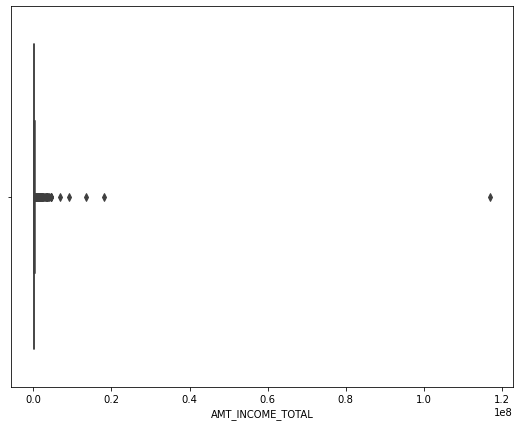

In [31]:
plt.figure(figsize=[9,7])
sns.boxplot(application['AMT_INCOME_TOTAL'])
plt.show()

In [32]:
Q1 = application['AMT_INCOME_TOTAL'].quantile(0.25)
Q1

112500.0

In [33]:
Q3 = application['AMT_INCOME_TOTAL'].quantile(0.75)
Q3

202500.0

In [34]:
IQR = Q3-Q1
IQR    

90000.0

In [35]:
upper_fence = Q3+1.5*IQR
upper_fence

337500.0

In [36]:
lower_fence = Q3-1.5*IQR
lower_fence

67500.0

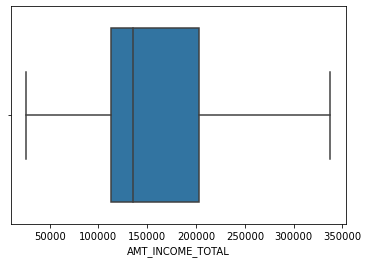

In [37]:
application = application[~(application['AMT_INCOME_TOTAL']>upper_fence)]
sns.boxplot(application['AMT_INCOME_TOTAL'])
plt.show()

In [38]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293474 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      293474 non-null  int64  
 1   NAME_CONTRACT_TYPE          293474 non-null  object 
 2   CODE_GENDER                 293474 non-null  object 
 3   FLAG_OWN_CAR                293474 non-null  object 
 4   FLAG_OWN_REALTY             293474 non-null  object 
 5   AMT_INCOME_TOTAL            293474 non-null  float64
 6   AMT_CREDIT                  293474 non-null  float64
 7   AMT_GOODS_PRICE             293474 non-null  float64
 8   NAME_INCOME_TYPE            293474 non-null  object 
 9   NAME_EDUCATION_TYPE         293474 non-null  object 
 10  NAME_FAMILY_STATUS          293474 non-null  object 
 11  NAME_HOUSING_TYPE           293474 non-null  object 
 12  DAYS_BIRTH                  293474 non-null  int64  
 13  DAYS_EMPLOYED 

In [39]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293474 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      293474 non-null  int64  
 1   NAME_CONTRACT_TYPE          293474 non-null  object 
 2   CODE_GENDER                 293474 non-null  object 
 3   FLAG_OWN_CAR                293474 non-null  object 
 4   FLAG_OWN_REALTY             293474 non-null  object 
 5   AMT_INCOME_TOTAL            293474 non-null  float64
 6   AMT_CREDIT                  293474 non-null  float64
 7   AMT_GOODS_PRICE             293474 non-null  float64
 8   NAME_INCOME_TYPE            293474 non-null  object 
 9   NAME_EDUCATION_TYPE         293474 non-null  object 
 10  NAME_FAMILY_STATUS          293474 non-null  object 
 11  NAME_HOUSING_TYPE           293474 non-null  object 
 12  DAYS_BIRTH                  293474 non-null  int64  
 13  DAYS_EMPLOYED 

I have removed all possible outliers from the AMT_INCOME_TOTAL

In [40]:
#Now handling outlier from AMT-CREDIT

application['AMT_CREDIT'].describe()

count    2.934740e+05
mean     5.797519e+05
std      3.844939e+05
min      4.500000e+04
25%      2.700000e+05
50%      4.995000e+05
75%      7.908300e+05
max      3.860019e+06
Name: AMT_CREDIT, dtype: float64

In [41]:
Q1 = application['AMT_CREDIT'].quantile(0.25)
Q3 = application['AMT_CREDIT'].quantile(0.75)
IQR = Q3-Q1

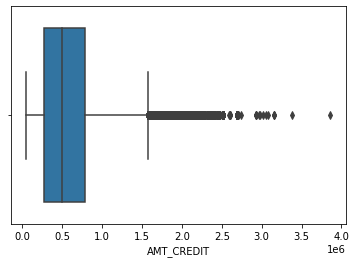

In [42]:
sns.boxplot(application['AMT_CREDIT'])
plt.show()

In [43]:
upper_fence = Q3+1.5*IQR
lower_fence = Q1-1.5*IQR

In [44]:
application = application[~(application['AMT_CREDIT']>upper_fence)]
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287722 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      287722 non-null  int64  
 1   NAME_CONTRACT_TYPE          287722 non-null  object 
 2   CODE_GENDER                 287722 non-null  object 
 3   FLAG_OWN_CAR                287722 non-null  object 
 4   FLAG_OWN_REALTY             287722 non-null  object 
 5   AMT_INCOME_TOTAL            287722 non-null  float64
 6   AMT_CREDIT                  287722 non-null  float64
 7   AMT_GOODS_PRICE             287722 non-null  float64
 8   NAME_INCOME_TYPE            287722 non-null  object 
 9   NAME_EDUCATION_TYPE         287722 non-null  object 
 10  NAME_FAMILY_STATUS          287722 non-null  object 
 11  NAME_HOUSING_TYPE           287722 non-null  object 
 12  DAYS_BIRTH                  287722 non-null  int64  
 13  DAYS_EMPLOYED 

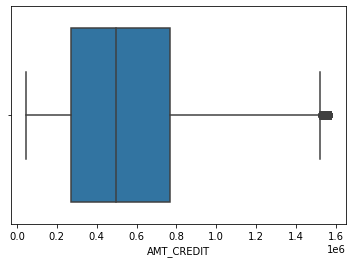

In [45]:
sns.boxplot(application['AMT_CREDIT'])
plt.show()

I have removed all possible outliers from AMT_CREDIT

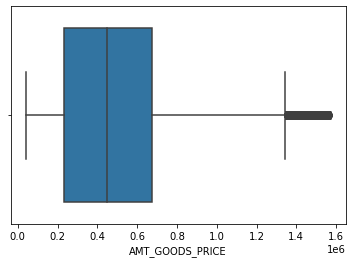

In [46]:
sns.boxplot(application['AMT_GOODS_PRICE'])
plt.show()

In [47]:
Q1 = application['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = application['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3-Q1
upper_fence = Q3+1.5*IQR
lower_fence = Q1-1.5*IQR

In [48]:
application = application[~(application['AMT_GOODS_PRICE']>upper_fence)]
application = application[~(application['AMT_GOODS_PRICE']<lower_fence)]

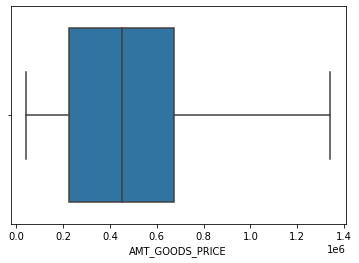

In [49]:
sns.boxplot(application['AMT_GOODS_PRICE'])
plt.show()

I have removed all possible outliers from AMT_GOODS_PRICE. I have handled missing values, fixed invalid data i.e., numbe of days was in negative so I have successfully converted that into positive by abs() function. 

In [50]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281743 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      281743 non-null  int64  
 1   NAME_CONTRACT_TYPE          281743 non-null  object 
 2   CODE_GENDER                 281743 non-null  object 
 3   FLAG_OWN_CAR                281743 non-null  object 
 4   FLAG_OWN_REALTY             281743 non-null  object 
 5   AMT_INCOME_TOTAL            281743 non-null  float64
 6   AMT_CREDIT                  281743 non-null  float64
 7   AMT_GOODS_PRICE             281743 non-null  float64
 8   NAME_INCOME_TYPE            281743 non-null  object 
 9   NAME_EDUCATION_TYPE         281743 non-null  object 
 10  NAME_FAMILY_STATUS          281743 non-null  object 
 11  NAME_HOUSING_TYPE           281743 non-null  object 
 12  DAYS_BIRTH                  281743 non-null  int64  
 13  DAYS_EMPLOYED 

In [51]:
application.describe()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE
count,281743.000000,281743.000000,2.817430e+05,2.817430e+05,281743.000000,281743.000000,281743.000000,281743.000000,281743.000000,281743.000000,281743.000000
mean,0.083431,151770.923103,5.355950e+05,4.780778e+05,16026.079090,69816.943871,2.143265,2.073436,0.013573,0.045428,954.150719
std,0.276533,62856.350810,3.197472e+05,2.864748e+05,4415.482085,141193.135839,0.912922,0.494515,0.115709,0.208241,821.779243
min,0.000000,25650.000000,4.500000e+04,4.050000e+04,7489.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,112500.000000,2.699820e+05,2.250000e+05,12325.000000,922.000000,2.000000,2.000000,0.000000,0.000000,270.000000
50%,0.000000,135000.000000,4.815000e+05,4.500000e+05,15723.000000,2199.000000,2.000000,2.000000,0.000000,0.000000,748.000000
75%,0.000000,184500.000000,7.551900e+05,6.750000e+05,19735.000000,5891.000000,3.000000,2.000000,0.000000,0.000000,1560.000000
max,1.000000,337500.000000,1.569042e+06,1.341000e+06,25201.000000,365243.000000,20.000000,3.000000,1.000000,1.000000,4292.000000


# UNIVARIATE ANALYSIS

UNIVARIATE ANALYSIS ON CATEGORICAL VARIABLES

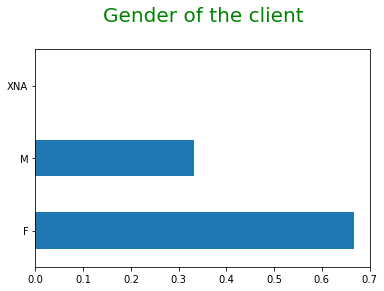

In [52]:
#1. Gender of the client

application.CODE_GENDER.value_counts(normalize= True).plot.barh()
plt.title("Gender of the client\n", fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()


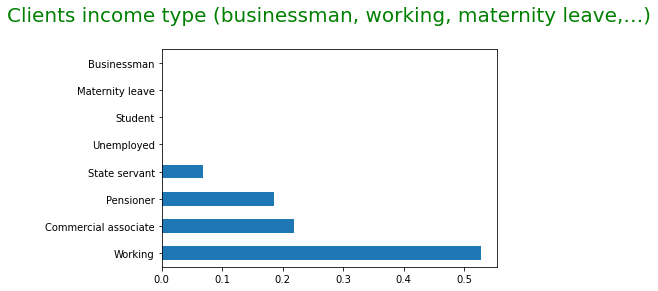

In [53]:
#2. Clients income type (businessman, working, maternity leave,…)


application.NAME_INCOME_TYPE.value_counts(normalize= True).plot.barh()
plt.title("Clients income type (businessman, working, maternity leave,…)\n", fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()

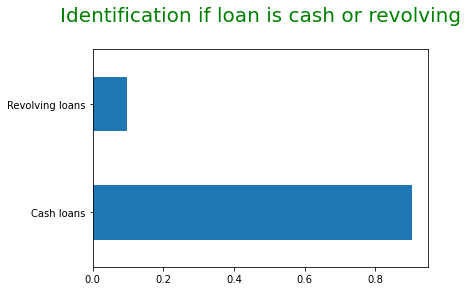

In [54]:
#3.  Identification if loan is cash or revolving

application.NAME_CONTRACT_TYPE.value_counts(normalize= True).plot.barh()
plt.title("Identification if loan is cash or revolving\n", fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()

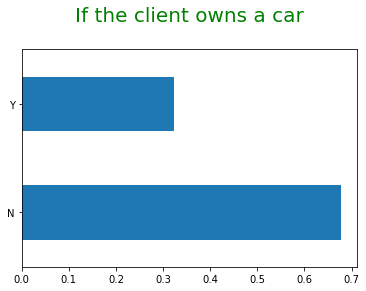

In [55]:
#4. IF Client owns a car

application.FLAG_OWN_CAR.value_counts(normalize= True).plot.barh()
plt.title("If the client owns a car\n", fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()

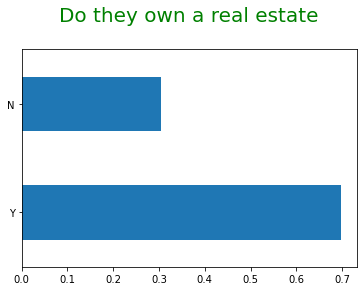

In [56]:
#5. Do they own a real estate

application.FLAG_OWN_REALTY.value_counts(normalize= True).plot.barh()
plt.title("Do they own a real estate\n", fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()

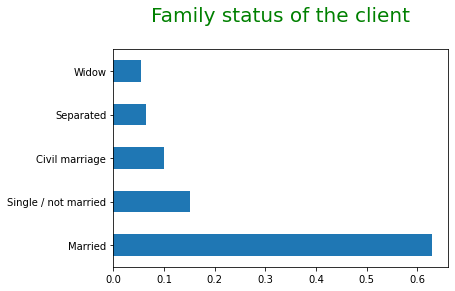

In [57]:
#6. Family status of the client

application.NAME_FAMILY_STATUS .value_counts(normalize= True).plot.barh()

plt.title("Family status of the client\n", fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()

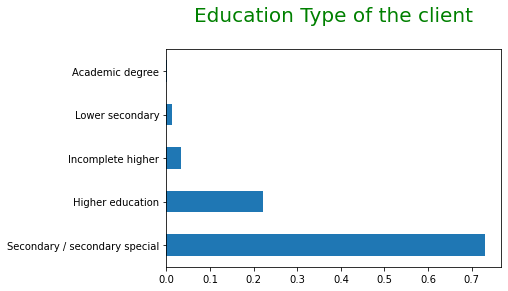

In [58]:
#7. Education Type of the client

application.NAME_EDUCATION_TYPE.value_counts(normalize= True).plot.barh()
plt.title("Education Type of the client\n", fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()

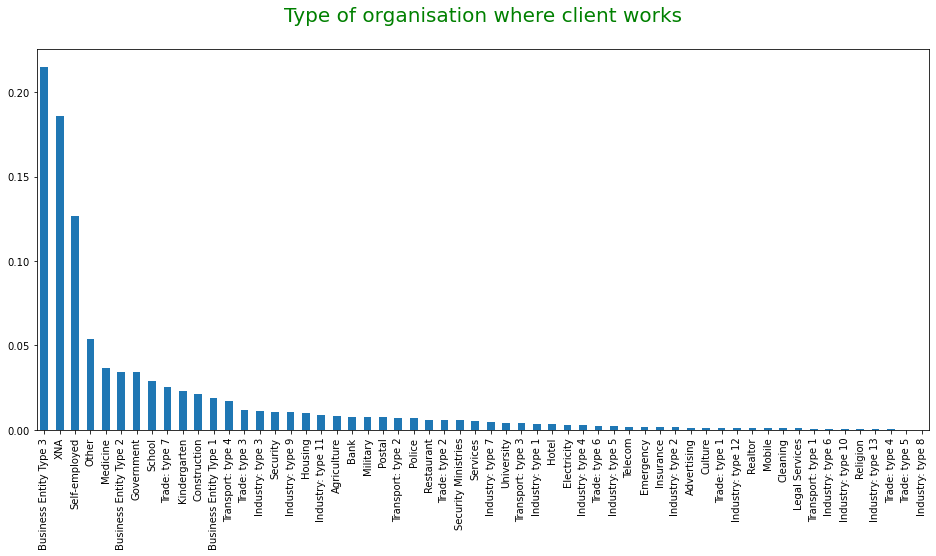

In [59]:
#8. Type of organisation where client works

plt.figure(figsize=[16,7])
application.ORGANIZATION_TYPE  .value_counts(normalize= True).plot.bar()
plt.title("Type of organisation where client works\n", fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.xticks(rotation=90)
plt.show() 

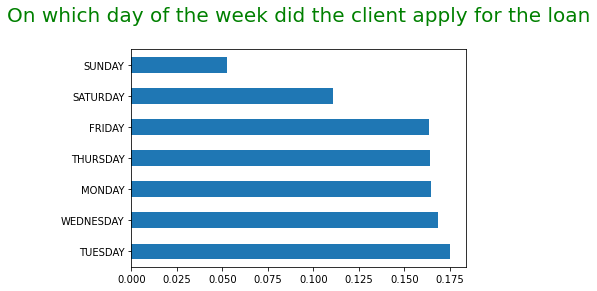

In [60]:
#9. WEEKDAY APPLICATION PROCESS

application.WEEKDAY_APPR_PROCESS_START.value_counts(normalize= True).plot.barh()
plt.title("On which day of the week did the client apply for the loan\n", fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()

UNIVARIATE ANALYSIS ON NUMERICAL CATEGORICAL VARIABLES

In [61]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281743 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      281743 non-null  int64  
 1   NAME_CONTRACT_TYPE          281743 non-null  object 
 2   CODE_GENDER                 281743 non-null  object 
 3   FLAG_OWN_CAR                281743 non-null  object 
 4   FLAG_OWN_REALTY             281743 non-null  object 
 5   AMT_INCOME_TOTAL            281743 non-null  float64
 6   AMT_CREDIT                  281743 non-null  float64
 7   AMT_GOODS_PRICE             281743 non-null  float64
 8   NAME_INCOME_TYPE            281743 non-null  object 
 9   NAME_EDUCATION_TYPE         281743 non-null  object 
 10  NAME_FAMILY_STATUS          281743 non-null  object 
 11  NAME_HOUSING_TYPE           281743 non-null  object 
 12  DAYS_BIRTH                  281743 non-null  int64  
 13  DAYS_EMPLOYED 

In [62]:
application['TARGET'].describe()

count    281743.000000
mean          0.083431
std           0.276533
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

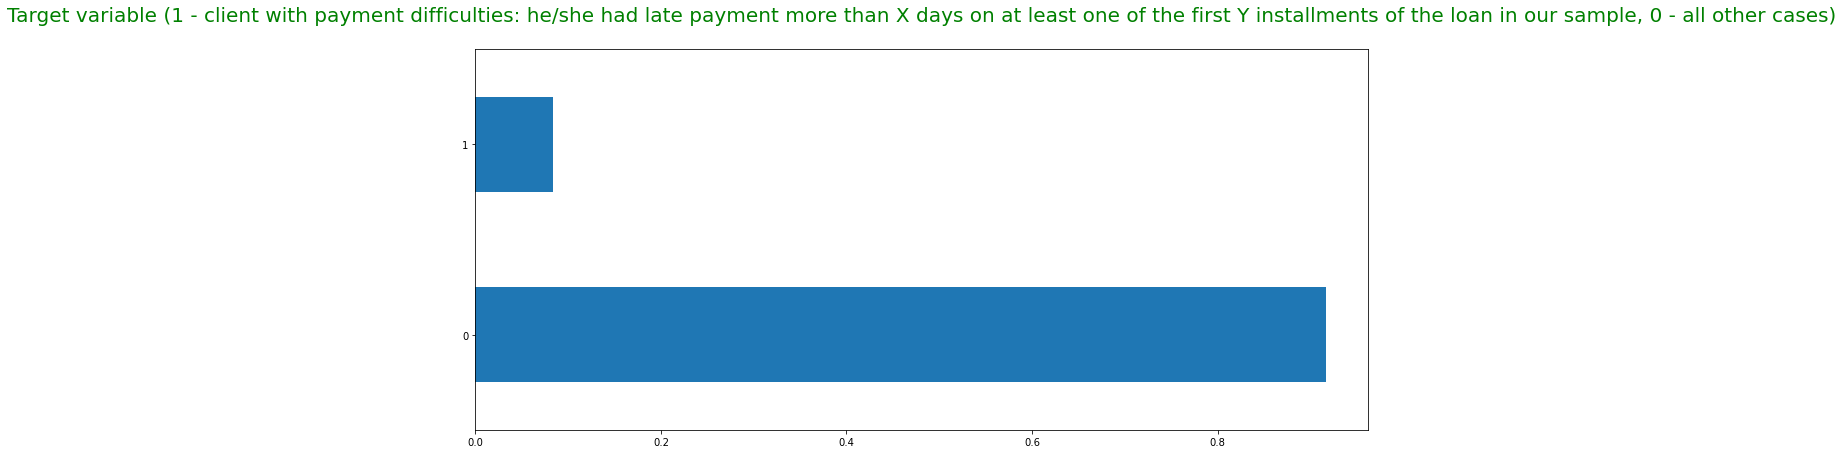

In [63]:
#1. TARGET VALUE
plt.figure(figsize=[16,7])
application.TARGET.value_counts(normalize= True).plot.barh()
plt.title("Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)\n", fontdict={'fontsize':20, 'fontweight': 5, 'color':'green'})
plt.show()

In [64]:
#2. DAYS_LAST_PHONE_CHANGE
application.DAYS_LAST_PHONE_CHANGE.describe()

count    281743.000000
mean        954.150719
std         821.779243
min           0.000000
25%         270.000000
50%         748.000000
75%        1560.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

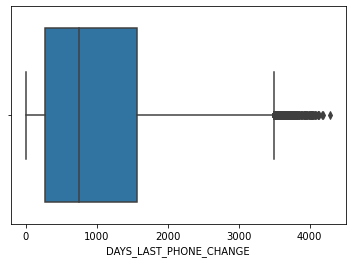

In [65]:
sns.boxplot(application.DAYS_LAST_PHONE_CHANGE)
plt.show()

In [66]:
Q1 = application['DAYS_LAST_PHONE_CHANGE'].quantile(0.25)
Q3 = application['DAYS_LAST_PHONE_CHANGE'].quantile(0.75)
IQR = Q3-Q1
upper_fence = Q3+1.5*IQR
lower_fence = Q1-1.5*IQR

In [67]:
application = application[~(application['DAYS_LAST_PHONE_CHANGE']>upper_fence)]
application = application[~(application['DAYS_LAST_PHONE_CHANGE']<lower_fence)]

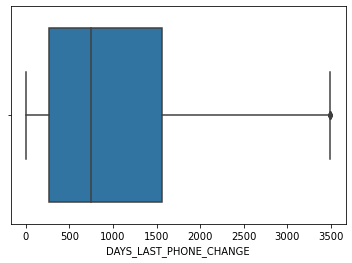

In [68]:
sns.boxplot(application['DAYS_LAST_PHONE_CHANGE'])
plt.show()

In [69]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281353 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      281353 non-null  int64  
 1   NAME_CONTRACT_TYPE          281353 non-null  object 
 2   CODE_GENDER                 281353 non-null  object 
 3   FLAG_OWN_CAR                281353 non-null  object 
 4   FLAG_OWN_REALTY             281353 non-null  object 
 5   AMT_INCOME_TOTAL            281353 non-null  float64
 6   AMT_CREDIT                  281353 non-null  float64
 7   AMT_GOODS_PRICE             281353 non-null  float64
 8   NAME_INCOME_TYPE            281353 non-null  object 
 9   NAME_EDUCATION_TYPE         281353 non-null  object 
 10  NAME_FAMILY_STATUS          281353 non-null  object 
 11  NAME_HOUSING_TYPE           281353 non-null  object 
 12  DAYS_BIRTH                  281353 non-null  int64  
 13  DAYS_EMPLOYED 

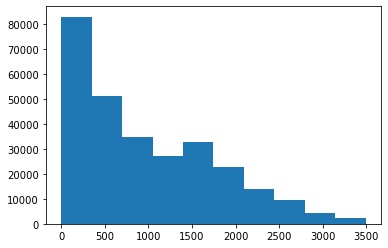

In [70]:
plt.hist(application['DAYS_LAST_PHONE_CHANGE'])
plt.show()

In [71]:
max(application['DAYS_LAST_PHONE_CHANGE'])

3494.0

# BIVARIATE AND MULTI-VARIATE ANALYSIS

In [72]:
application.TARGET.unique()

array([1, 0], dtype=int64)

In [73]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281353 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      281353 non-null  int64  
 1   NAME_CONTRACT_TYPE          281353 non-null  object 
 2   CODE_GENDER                 281353 non-null  object 
 3   FLAG_OWN_CAR                281353 non-null  object 
 4   FLAG_OWN_REALTY             281353 non-null  object 
 5   AMT_INCOME_TOTAL            281353 non-null  float64
 6   AMT_CREDIT                  281353 non-null  float64
 7   AMT_GOODS_PRICE             281353 non-null  float64
 8   NAME_INCOME_TYPE            281353 non-null  object 
 9   NAME_EDUCATION_TYPE         281353 non-null  object 
 10  NAME_FAMILY_STATUS          281353 non-null  object 
 11  NAME_HOUSING_TYPE           281353 non-null  object 
 12  DAYS_BIRTH                  281353 non-null  int64  
 13  DAYS_EMPLOYED 

In [74]:
corr = application.groupby('TARGET')['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','REGION_RATING_CLIENT','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','DAYS_LAST_PHONE_CHANGE'].corr()
corr

AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET                                                            
0      AMT_INCOME_TOTAL                    1.000000    0.336304   
       AMT_CREDIT                          0.336304    1.000000   
       AMT_GOODS_PRICE                     0.340244    0.982018   
       DAYS_BIRTH                         -0.099946    0.046821   
       DAYS_EMPLOYED                      -0.186231   -0.067622   
       REGION_RATING_CLIENT               -0.179488   -0.052886   
       REG_REGION_NOT_LIVE_REGION          0.071938    0.008309   
       REG_REGION_NOT_WORK_REGION          0.150429    0.027925   
       DAYS_LAST_PHONE_CHANGE              0.057653    0.075467   
1      AMT_INCOME_TOTAL                    1.000000    0.310913   
       AMT_CREDIT                          0.310913    1.000000   
       AMT_GOODS_PRICE                     0.312057    0.977975   
       DAYS_BIRTH                         -0.017330    0.131574   
       DAYS_EMPLOYED                      -0.131139   -0.000118   
       REGION_RATING_CLIENT               -0.147926   -0.041607   
       REG_REGION_NOT_LIVE_REGION          0.068126   -0.001775   
       REG_REGION_NOT_WORK_REGION          0.149414    0.018686   
       DAYS_LAST_PHONE_CHANGE              0.073003    0.103250   

                                   AMT_GOODS_PRICE  DAYS_BIRTH  DAYS_EMPLOYED  \
TARGET                                                                          
0      AMT_INCOME_TOTAL                   0.340244   -0.099946      -0.186231   
       AMT_CREDIT                         0.982018    0.046821      -0.067622   
       AMT_GOODS_PRICE                    1.000000    0.044677      -0.066018   
       DAYS_BIRTH                         0.044677    1.000000       0.636772   
       DAYS_EMPLOYED                     -0.066018    0.636772       1.000000   
       REGION_RATING_CLIENT              -0.055021   -0.003486       0.031031   
       REG_REGION_NOT_LIVE_REGION         0.010563   -0.065926      -0.036706   
       REG_REGION_NOT_WORK_REGION         0.029177   -0.097672      -0.106646   
       DAYS_LAST_PHONE_CHANGE             0.079564    0.074912      -0.023220   
1      AMT_INCOME_TOTAL                   0.312057   -0.017330      -0.131139   
       AMT_CREDIT                         0.977975    0.131574      -0.000118   
       AMT_GOODS_PRICE                    1.000000    0.132620       0.005206   
       DAYS_BIRTH                         0.132620    1.000000       0.588971   
       DAYS_EMPLOYED                      0.005206    0.588971       1.000000   
       REGION_RATING_CLIENT              -0.050443   -0.034157      -0.000123   
       REG_REGION_NOT_LIVE_REGION         0.001901   -0.055409      -0.032551   
       REG_REGION_NOT_WORK_REGION         0.022878   -0.069948      -0.088356   
       DAYS_LAST_PHONE_CHANGE             0.113179    0.104492      -0.001294   

                                   REGION_RATING_CLIENT  \
TARGET                                                    
0      AMT_INCOME_TOTAL                       -0.179488   
       AMT_CREDIT                             -0.052886   
       AMT_GOODS_PRICE                        -0.055021   
       DAYS_BIRTH                             -0.003486   
       DAYS_EMPLOYED                           0.031031   
       REGION_RATING_CLIENT                    1.000000   
       REG_REGION_NOT_LIVE_REGION             -0.040025   
       REG_REGION_NOT_WORK_REGION             -0.125147   
       DAYS_LAST_PHONE_CHANGE                 -0.019112   
1      AMT_INCOME_TOTAL                       -0.147926   
       AMT_CREDIT                             -0.041607   
       AMT_GOODS_PRICE                        -0.050443   
       DAYS_BIRTH                             -0.034157   
       DAYS_EMPLOYED                          -0.000123   
       REGION_RATING_CLIENT                    1.000000   
       REG_REGION_NOT_LIVE_REGION             -0.027646   
       REG_

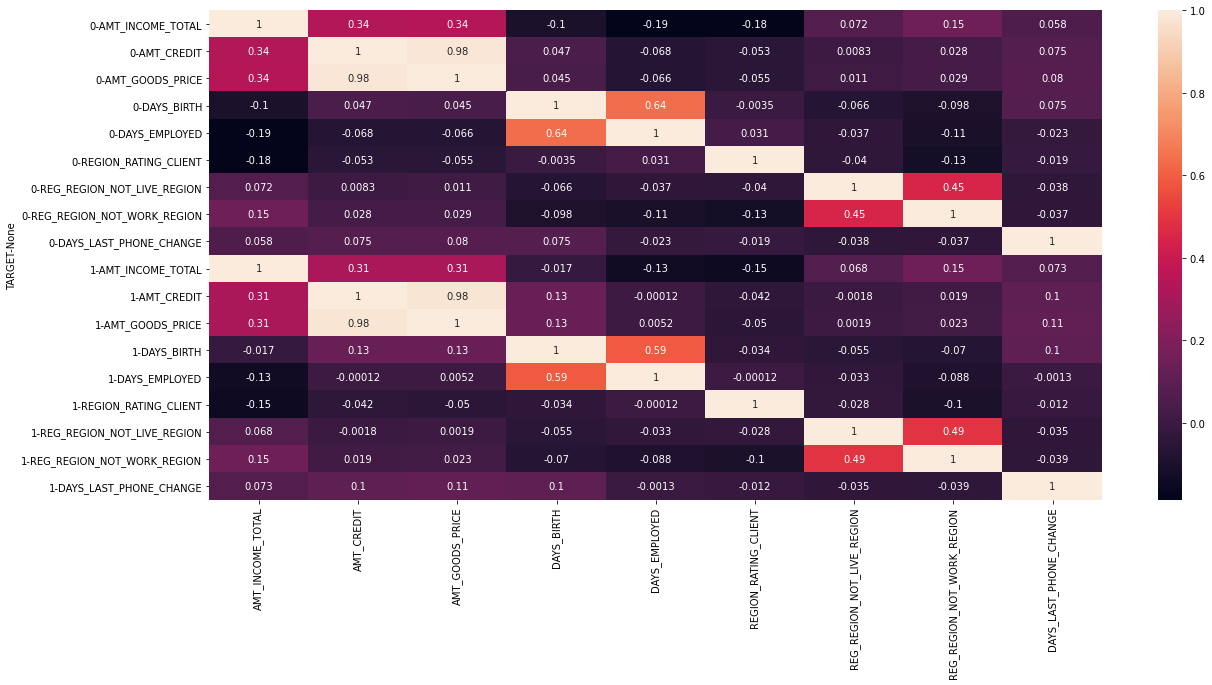

In [75]:
plt.figure(figsize=[20,9])
sns.heatmap(corr, annot=True)
plt.show()

As per the heatmap above on Target - 1(client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample):
1. AMT_CREDIT & AMT_INCOME_TOTAL: 0.31
2. AMT_CREDIT & AMT_GOODS_PRICE : 0.98
3. DAYS_BIRTH & DAYS_EMPLOYED : 0.59
4. REG_REGION_NOT_LIVE_REGION & REG_REGION_NOT_WORK_REGION : 0.49
5. REG_REGION_NOT_WORK_REGION & AMT_INCOME_TOTAL : 0.15
6. AMT_CREDIT & DAYS_BIRTH : 0.13
7. AMT_GOODS_PRICE & DAYS_BIRTH : 0.13 
8. AMT_INCOME_TOTAL & AMT_GOODS_PRICE : 0.31
9. REG_REGION_NOT_LIVE_REGION & AMT_INCOME_TOTAL : 0.068
10. AMT_GOODS_PRICE & DAYS_LAST_PHONE_CHANGE : 0.11